# Clase 4

¡Bienvenidos a la última clase! Concluiremos el curso aprendiendo a realizar gráficos en Python. Pero primero, repasemos el último tema.


## Repaso de pandas

Si tuviésemos que realizar el trabajo de leer cada spreadsheet (.xml, .csv) línea por línea, separando cuando hay comas, estructurando a mano la información que vamos obteniendo, sería un trabajo muy tedioso, repetitivo y propenso a errores, ¡no valdría la pena! 

Por suerte, las funciones que realizan estas tareas ya han sido programadas por la comunidad de Python, y entonces lo que tenemos que hacer se reduce sólo a llamar a funciones de la librería Pandas con distintos parámetros. Este es el caso para la mayoría de las tareas de este tipo: siempre que una función ya esté implementada en una librería estándar, usarla nos ahorra tiempo y mejora nuestro código - ¡no hay que reinventar la rueda!

Traigamos el archivo de la clase anterior usando el siguiente codigo:



In [0]:
! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/Datos.csv"

--2019-05-18 17:23:14--  https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/Datos.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200 [text/plain]
Saving to: ‘Datos.csv’

Datos.csv           100%[===================>]     200  --.-KB/s    in 0s      

2019-05-18 17:23:19 (21.7 MB/s) - ‘Datos.csv’ saved [200/200]



### Como abrir un csv
Primero por tratarse de una libreria debemos realizar el import con:

> **import** pandas **as** pd

Recueden que el **pd** es unicamente el nombre que le damos a la libreria dentro de nuestro codigo para no tener que escribir todas las veces pandas. .

Ahora para leer un csv podemos utilizar:

> **pd.read_csv**($nombre$ $del$ $archivo$) 

Esto nos devolvera un pandas **dataframe** es un tipo de estructura de datos muy utilizada para machine learning y big data.

In [0]:
import pandas as pd

datos = pd.read_csv("Datos.csv") 
# la variable datos es un tipo de dato especial de pandas
print(datos)

   Legajo Nombre    Apellido  Quimica  Matematica  Fisica
0   34567   Juan    Martinez       10           7       9
1   34678  Pablo    Gonzales        4           9       4
2   34234  Maria  Citanovich        2           4       4
3   35679    Sol        Rios        9           8      10
4   36789  Paula       Lagos        8           5       8
5   32578  Tomas         Reu        1           4       2


Ahora para acceder a una columna simplemente accedemos de la siguiente manera:

> variable**[** $columna$ **]**: esto nos devolvera la columa deseada.

Veamos un ejemplo:

In [0]:
print(datos['Quimica'])

0    10
1     4
2     2
3     9
4     8
5     1
Name: Quimica, dtype: int64


Ahora hagamos un promedio de los alumnos en quimica:

Tip: Podemos usar la función **sum**($iterable$) para obtener la suma de todos los campos.


In [0]:
suma = sum(datos['Quimica'])
prom = suma/len(datos['Quimica'])
print(prom)

5.666666666666667


Ejercicio:
Obtener el promedio de Matematica

Ahora si queremos acceder a unicamente un alumno podemos realizar lo siguiente:

> variable.**loc[**indice**]**

Esto nos permite acceder por fila al dataframe, es distinto su acceso ya que los dataframes estan pensados para extraer información de grandes volumens de datos sin que importe el individuo.

In [0]:
print(datos.loc[0])

Legajo           34567
Nombre            Juan
Apellido      Martinez
Quimica             10
Matematica           7
Fisica               9
Name: 0, dtype: object


In [0]:
print(datos.loc[0]['Legajo'])
print(datos.loc[0]['Matematica'])

34567
7


Ejercicio: Escribir una función que le pases el dataframe, el indice y haga el promedio de sus materias.

Pandas nos permite trabajar de forma simple con los datos, filtrarlos, sumarlos.

Veamos operaciones con los datos:

- Operaciones matematicas: Veamos un ejemplo para sacar todos los promedios de los alumnos a la vez.

In [0]:
promedios = (datos['Quimica']+datos['Matematica']+datos['Fisica'])/3
print('Todos los promedios')
print(res)
print('El promedio del alumno 0 es',promedios.loc[0])

Todos los promedios
0    8.666667
1    5.666667
2    3.333333
3    9.000000
4    7.000000
5    2.333333
dtype: float64
El promedio del alumno 0 es 8.666666666666666


- Filtrado: Nos permite filtrar los datos segun alguna condicion. Esto se realiza de la siguiente manera
>> variable**[** (condicion1) &/| (condicion2) &/| (condicion3) ...  **]**

>> Las condiciones siguien el siguiente formato: variable**[** propiedad **]** >/</<=/... (numero)

> Nota: No debe ser si o si un numero, puede chequearse contra cualquier cosa mientras se puedan cumplir esas condiciones (mayor, menor, mayor o igual, igual, etc.).

> Veamos un ejemplo extrayendo todos los alumnos que hayan aprobado quimica (nota>4):

In [0]:
aprobados = datos[datos['Quimica']>4]
print(aprobados)

   Legajo Nombre  Apellido  Quimica  Matematica  Fisica
0   34567   Juan  Martinez       10           7       9
3   35679    Sol      Rios        9           8      10
4   36789  Paula     Lagos        8           5       8


Ejercicio: Obtener el promedio general de todos los aprobados en Matematica.

- Agregar columnas: Para agregar una columa simplemente utilizamos
>> variable**[** nombre nueva columna **]** = datos nueva columna

> Veamos un ejemplo:

In [0]:
promedios = (datos['Quimica']+datos['Matematica']+datos['Fisica'])/3
datos['Promedio'] = promedios
print(datos)

   Legajo Nombre    Apellido  Quimica  Matematica  Fisica  Promedio
0   34567   Juan    Martinez       10           7       9  8.666667
1   34678  Pablo    Gonzales        4           9       4  5.666667
2   34234  Maria  Citanovich        2           4       4  3.333333
3   35679    Sol        Rios        9           8      10  9.000000
4   36789  Paula       Lagos        8           5       8  7.000000
5   32578  Tomas         Reu        1           4       2  2.333333


- Obtener los datos en un diccionario: Pandas tambien nos permite obtener los datos de una forma que ya conocemos que es como un diccionario. Para ello le debemos decir cuales van a ser los keys que debe utilizar. Para eso cuando lo leemos le debemos decir la columna que queremos usar de indice.

>> pd.read_csv('archivo', **index_col** = [propiedad])

> Veamos un ejemplo:



In [0]:
import pandas as pd

archivo = pd.read_csv("Datos.csv", index_col =["Legajo"]) 
print(archivo)

       Nombre    Apellido  Quimica  Matematica  Fisica
Legajo                                                
34567    Juan    Martinez       10           7       9
34678   Pablo    Gonzales        4           9       4
34234   Maria  Citanovich        2           4       4
35679     Sol        Rios        9           8      10
36789   Paula       Lagos        8           5       8
32578   Tomas         Reu        1           4       2


> Observen que ahora la primera columna en vez de ser 0,1,2,... son los legajos, esto nos permite acceder con .loc por legajo!

In [0]:
print(archivo.loc[34567])

Nombre            Juan
Apellido      Martinez
Quimica             10
Matematica           7
Fisica               9
Name: 34567, dtype: object


> Ahora podemos pedirle que nos transforme en un diccionario como el que armamos la clase pasada, para ello usamos lo siguiente:

>> variable.**to_dict**("index")

> Nota: El metodo to_dict permite pasarle otras cosas que no sean "index" para obtener los datos de multiples maneras. Si quieren investigar les dejamos el siguiente link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_dict.html 

In [0]:
diccionario = archivo.to_dict("index")
print(diccionario)

{34567: {'Nombre': 'Juan', 'Apellido': 'Martinez', 'Quimica': 10, 'Matematica': 7, 'Fisica': 9}, 34678: {'Nombre': 'Pablo', 'Apellido': 'Gonzales', 'Quimica': 4, 'Matematica': 9, 'Fisica': 4}, 34234: {'Nombre': 'Maria', 'Apellido': 'Citanovich', 'Quimica': 2, 'Matematica': 4, 'Fisica': 4}, 35679: {'Nombre': 'Sol', 'Apellido': 'Rios', 'Quimica': 9, 'Matematica': 8, 'Fisica': 10}, 36789: {'Nombre': 'Paula', 'Apellido': 'Lagos', 'Quimica': 8, 'Matematica': 5, 'Fisica': 8}, 32578: {'Nombre': 'Tomas', 'Apellido': 'Reu', 'Quimica': 1, 'Matematica': 4, 'Fisica': 2}}


## Visualización de datos
Bienvenidos a la clase 4. Hasta ahora, se les ha enseñado un manejo del lenguaje que les permitió escribir, leer e interactuar con información. 

En esta clase comenzaremos a enseñarles formas de que la información sea visualizada de una manera sencilla pero al mismo tiempo adecuada. 

Siempre la forma en la que mostramos datos debe enfatizar algun aspecto de ellos que queremos enfatizar.

En Python la forma más usual con la que se visualiza la información es utilizando la libería maplotlib

<img src="https://matplotlib.org/_static/logo2.png" width="500" alt="matplotlib logo" title="Utilizado en el ámbito cientifico para todo tipo de graficos. Casi mejor que MATLAB... casi">

### MatplotLib
[Matplotlib](https://en.wikipedia.org/wiki/Matplotlib) nos ofrece una gran variedad de formas para visualizar datos. A continuación les mostramos algunos ejemplos de graficos realizados con la librería

<img src="https://scipy-cookbook.readthedocs.io/_downloads/contourf3D.png" width=300px>

<img src="https://s3.amazonaws.com/stackabuse/media/linear-regression-python-scikit-learn-1.png" width=300px>

<img src="https://www.machinelearningplus.com/wp-content/uploads/2018/11/23_DensityPlot_With_Histogram_Matplotlib-min.png" width=300px>

<img src="https://www.machinelearningplus.com/wp-content/uploads/2018/11/29_PyramidPlot_Matplotlib-min.png" width=300px>
<img src="https://www.machinelearningplus.com/wp-content/uploads/2018/11/36_TimeSeries_Peaks_Troughs_Matplotlib-min.png" width=300px>

A partir de ahora les daremos una introducción en el uso de matplotlib, en particular complementaremos los conocimientos de la clase anterior para la lectura y de archivos; les mostraremos como lograr que dicha información sea mostrada en distintos tipos de graficos

### Gráfico simple (función plot)
Es el gráfico comun con una linea que interpola todos los puntos. Lo llamamos de la siguiente manera.

> plt.**plot**(x,y,$propiedades$)

Para que muestre los graficos le debemos decir a matplotlib:

> plt.**show**()

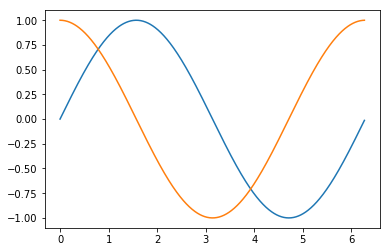

In [0]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,2*3.14,0.01)
y = np.sin(x)
y2 = np.cos(x)
plt.plot(x,y) # graficamos función y
plt.plot(x,y2) # graficamos función x
plt.show()

Algunas propiedades utiles que le podemos agregar son:

- En la primera opcion le podemos pasar un string que indica el color y el tipo de linea. 'b-.' seria una linea azul linea punto: 

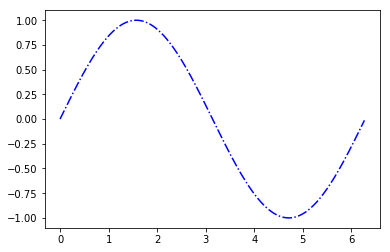

In [0]:
x = np.arange(0,2*3.14,0.01)
y = np.sin(x)
plt.plot(x,y,'b-.') # graficamos función y
plt.show()

> Les dejamos algunos colores y tipos de lineas:

<img src="https://github.com/IEEESBITBA/Curso-Python/blob/master/_assets/ColoresLineas.png?raw=True" height="600px">



- label: Nos permite ponerle un nombre a la linea. Esto lo hacemos agregando el parametro **label=**nombre de la funcion.

> Nota: Debemos decirle a matplotlib que muestre el nombre esto lo hacemos llamando a:  plt.**legend**()

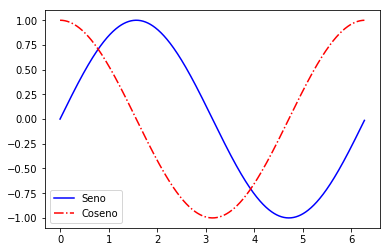

In [0]:
x = np.arange(0,2*3.14,0.01)
y = np.sin(x)
y2 = np.cos(x)
plt.plot(x,y,'b-',label='Seno') # graficamos función y
plt.plot(x,y2,'r-.',label='Coseno') # graficamos función x
plt.legend()
plt.show()

Ejercicio: Graficar un circulo. recordar que $x=r\cdot cos(\theta),y=r\cdot sin(\theta)$

### Piechart
Este grafico lo realizamos con la siguiente funcion:

> plt.**pie**($tamaños$)

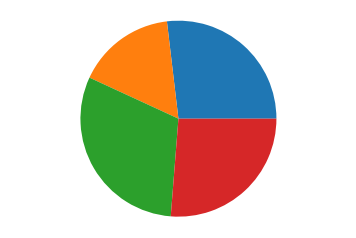

In [0]:
import matplotlib.pyplot as plt

sizes = [215, 130, 245, 210]

 
plt.pie(sizes)
plt.axis('equal')
plt.show()

El gráfico asi no nos dice mucho, por lo que con las siguientes opciones podemos hacerlo mas util:

- explode: Le indicamos si alguna de las porciones deben estar alejadas del centro/



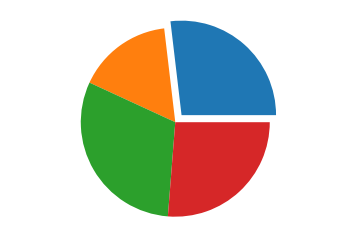

In [0]:
import matplotlib.pyplot as plt


sizes = [215, 130, 245, 210]


explode = (0.1, 0, 0, 0)  # explode 1st slice
 
plt.pie(sizes, explode=explode)
 #en autopct ponemos como deseamos que se escriban los porcentajes

plt.axis('equal')
plt.show()

- labels: Le indicamos el nombre de cada porción.


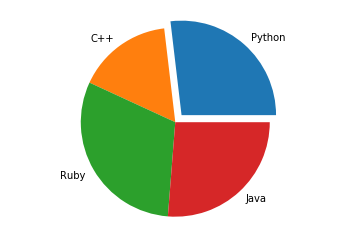

In [0]:
import matplotlib.pyplot as plt

labels = ('Python', 'C++', 'Ruby', 'Java')
sizes = [215, 130, 245, 210]


explode = (0.1, 0, 0, 0)  # explode 1st slice
 
plt.pie(sizes, explode=explode, labels=labels)
 #en autopct ponemos como deseamos que se escriban los porcentajes

plt.axis('equal')
plt.show()

- colors: Le podemos asignar un color nosotros.


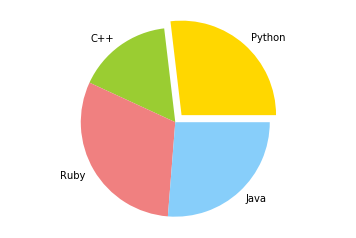

In [0]:
import matplotlib.pyplot as plt

labels = ('Python', 'C++', 'Ruby', 'Java')
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

explode = (0.1, 0, 0, 0)  # explode 1st slice
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors)
 #en autopct ponemos como deseamos que se escriban los porcentajes

plt.axis('equal')
plt.show()

- startangle: Le idnicamos el angulo de rotación.


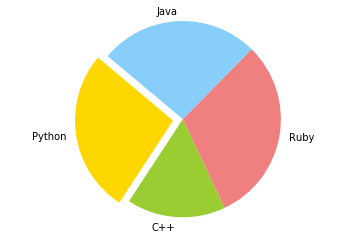

In [0]:
import matplotlib.pyplot as plt

labels = 'Python', 'C++', 'Ruby', 'Java'
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

explode = (0.1, 0, 0, 0)  # explode 1st slice
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,  startangle=140)
 #en autopct ponemos como deseamos que se escriban los porcentajes

plt.axis('equal')
plt.show()

- autopct: Le indicamos que nos muestre los porcentajes. Esto sigue una sintaxis estandar, pero para que muestre un decimal se usa la siguiente "%1.1f%%" esto le dice que vamos a mostrar un numero float con 1 decimal, el %% indica que queremos el simbolo %. 

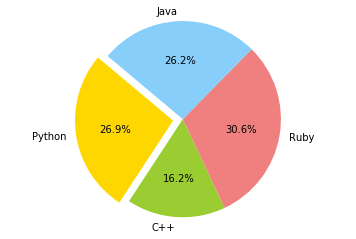

In [0]:
import matplotlib.pyplot as plt

labels = ('Python', 'C++', 'Ruby', 'Java')
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

explode = (0.1, 0, 0, 0)  # explode 1st slice
 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',  startangle=140)
 #en autopct ponemos como deseamos que se escriban los porcentajes

plt.axis('equal')
plt.show()

Ejercicio: Hacer una pizza con 4 sabores distintos

Nota: SI quieren mas información de como mostrar la información efectivamente usando piecharts les dejamos este link: https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

### Stem plot
Para graficar puntos, esto se realiza de la siguiente manera:

> plt.**stem**(x,y)

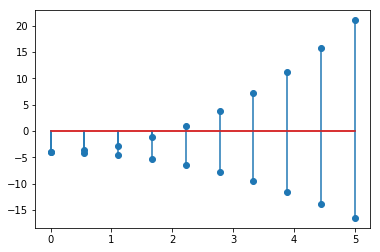

In [0]:
import matplotlib.pyplot as plt
import numpy as np

puntos = 10
espacio = 1

inicio = 0 
fin =  5

x = np.linspace(inicio,fin, puntos)
y = x**2-4
y2 = -0.5*x**2-4
# En la priemra letra le decimos el color y despues el estilo de linea

plt.stem(x, y )
plt.stem(x,y2)


plt.show()

Pero esto no se ve muy lindo, por lo que podemos al igual que las lineas decirle el color, el tipo de linea y el nombre:

Nota: Podemos combinar este grafico con plot!

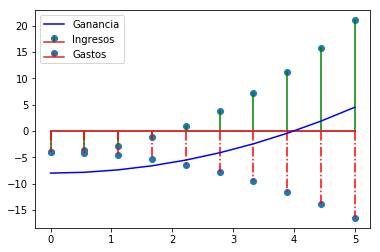

In [0]:
import matplotlib.pyplot as plt
import numpy as np

puntos = 10
espacio = 1

inicio = 0 
fin =  5

x = np.linspace(inicio,fin, puntos)
y = x**2-4
y2 = -0.5*x**2-4
# En la priemra letra le decimos el color y despues el estilo de linea

plt.stem(x, y ,'g-',label='Ingresos')
plt.stem(x,y2,'r-.',label = 'Gastos')
plt.plot(x,y+y2,'b-',label = 'Ganancia')

plt.legend()
plt.show()

Pero observamos que el punto de los gastos esta en azul, esto podemos cambiarlo con:
-  markerfmt=color y punto: Le indicamos un color y un tipo de punto con una sintaxis parecida el tipo de linea.

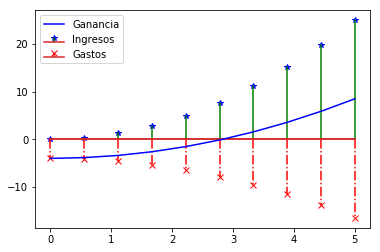

In [0]:
import matplotlib.pyplot as plt
import numpy as np

puntos = 10
espacio = 1

inicio = 0 
fin =  5

x = np.linspace(inicio,fin, puntos)
y = x**2
y2 = -0.5*x**2-4
# En la priemra letra le decimos el color y despues el estilo de linea

plt.stem(x, y ,'g-',label='Ingresos',markerfmt='b*')
plt.stem(x,y2,'r-.',label = 'Gastos',markerfmt='rx')
plt.plot(x,y+y2,'b-',label = 'Ganancia')

plt.legend()
plt.show()

### Histograma

Para realizar un histograma utilizamos la función:

> plt.**hist**(x,numero de bins,propiedades)

Veamos un ejemplo:

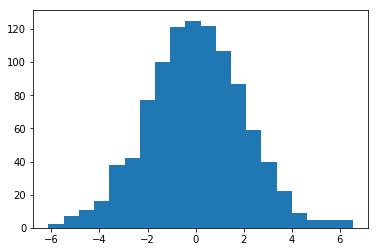

In [0]:
import matplotlib.pyplot as plt
import numpy as np

rand = np.random.normal(0,2,1000)
plt.hist(rand,20)
plt.show()

Podemos superponerle la función teorica:

Nota: le podemos pasar el parametro densit=True indicandole que normalize el histograma

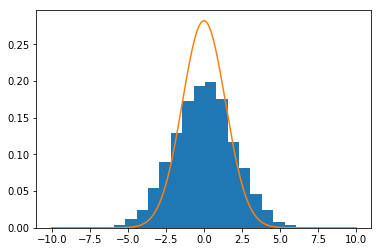

In [0]:
import matplotlib.pyplot as plt
import numpy as np
mu = 0
var = 2
t = np.arange(-10,10,0.01)
y = 1/np.sqrt(2*np.pi*var)*np.exp(-(t-mu)**2/(2*var))
rand = np.random.normal(mu,var,10000)
plt.hist(rand,20,density=True)
plt.plot(t,y)
plt.show()

## Gráficos: opciones

Cuando realizamos un gráfico, no sólo es importante la información que mostramos en el mismo, sino cómo lo hacemos. Si bien Matplotlib tiene una configuración por default para el formato, lo cual nos permite realizar gráficos rápidos sin preocuparnos por esos detalles, de ser nesario nos permite personalizar el formato del gráfico tanto como requiera nuestro proyecto.

Para poder indicarle a Matplotlib qué parte del formato queremos configurar, primero debemos saber los nombres que utiliza para las partes del gráfico. 

<img src="https://matplotlib.org/_images/anatomy.png" width=400px>

---
*Comentario: esta nomenclatura no es única de matplotlib - les sirve también para otras librerías de python y otros lenguajes*

Muchas veces es conveniente agregarle grilla y referencias a los gráficos, para poder lograr contrastar la información de manera adecuada. Una de las formas de lograr esto es con el siguiente código:

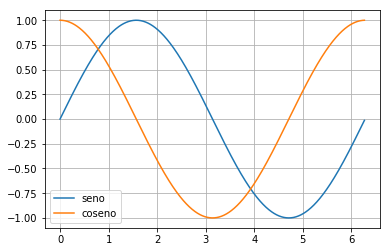

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

x = np.arange(0,2*3.14,0.01)
y = np.sin(x)
y2 = np.cos(x)
plt.plot(x,y,label='seno') # graficamos función y
plt.plot(x,y2,label='coseno') # graficamos función x

plt.grid()    # agrego grilla
plt.legend()  # muestro las labels

plt.show()    # muestro el grafico

Tambien podemos ponerle nombres a los ejes usando:

> plt.**xlabel**(nombre) o plt.**ylabel**(nombre)

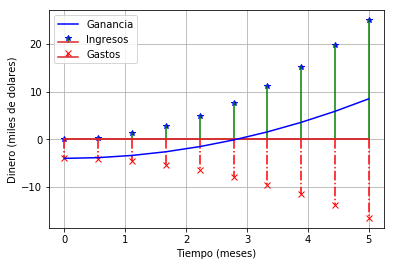

In [0]:
import matplotlib.pyplot as plt
import numpy as np

puntos = 10
espacio = 1

inicio = 0 
fin =  5

x = np.linspace(inicio,fin, puntos)
y = x**2
y2 = -0.5*x**2-4
# En la priemra letra le decimos el color y despues el estilo de linea

plt.stem(x, y ,'g-',label='Ingresos',markerfmt='b*')
plt.stem(x,y2,'r-.',label = 'Gastos',markerfmt='rx')
plt.plot(x,y+y2,'b-',label = 'Ganancia')

plt.legend()
plt.grid()
plt.xlabel('Tiempo (meses)')
plt.ylabel('Dinero (miles de dolares)')
plt.show()

Podemos agregarle un titulo al gráfico con la siguiente función:

> plt.**title**(titulo)

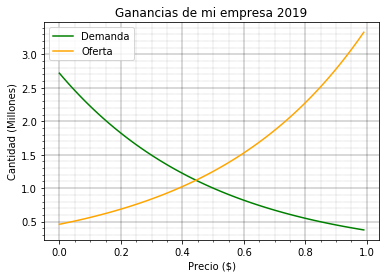

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# valores de los componentes
# genero un vector con tiempos para evaluar las funciones y plotear

t = np.arange(0, 1, 0.01)

y = np.exp(-t*2+1)

y2 = 1.25*np.exp(t*2-1)

plt.plot(t, y, "green",label="Demanda")
plt.plot(t, y2, "orange",label="Oferta")


plt.ylabel("Cantidad (Millones)")
plt.xlabel("Precio ($)")

# pongo una grilla
#Agregamos Sub divisiones a la grilla
plt.minorticks_on()
#Le asignamos el estilo a la grilla pequeña
plt.grid(which='minor', linestyle=':', linewidth=0.2, color='black')
#Le asignamos el estilo a la grilla mayor
plt.grid(which='major', linestyle='-', linewidth=0.3, color='black')

#agregamos el titulo
plt.title("Ganancias de mi empresa 2019")
# agregamos leyenda
plt.legend()

# muestro el grafico que prepare

plt.show()

Podemos tambien modificar la grilla utilizando:

> plt.**minorticks_on**(): Para encender los minor ticks

> plt.**grid**(which='minor'/'mayor', linestyle=tipo de linea, linewidth=ancho, color=color)

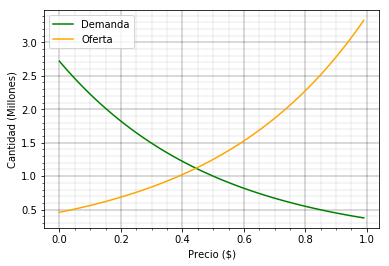

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# valores de los componentes
# genero un vector con tiempos para evaluar las funciones y plotear

t = np.arange(0, 1, 0.01)

y = np.exp(-t*2+1)

y2 = 1.25*np.exp(t*2-1)

plt.plot(t, y, "green",label="Demanda")
plt.plot(t, y2, "orange",label="Oferta")


plt.ylabel("Cantidad (Millones)")
plt.xlabel("Precio ($)")

# pongo una grilla
#Agregamos Sub divisiones a la grilla
plt.minorticks_on()
#Le asignamos el estilo a la grilla pequeña
plt.grid(which='minor', linestyle=':', linewidth=0.2, color='black')
#Le asignamos el estilo a la grilla mayor
plt.grid(which='major', linestyle='-', linewidth=0.3, color='black')


# agregamos leyenda
plt.legend()

# muestro el grafico que prepare

plt.show()

Tambien podemos cambiarle el tamaño a la figura, para ello le debemos indicar antes de graficar que vamos a trabajar en una figura del tamaño que queramos (en pulgadas =( ). Esto lo hacemos de la siguiente manera:

> plt.**figure(** figsize = (ancho,alto) **)**

> ... Todo lo que queramos graficar

> plt.**show**()

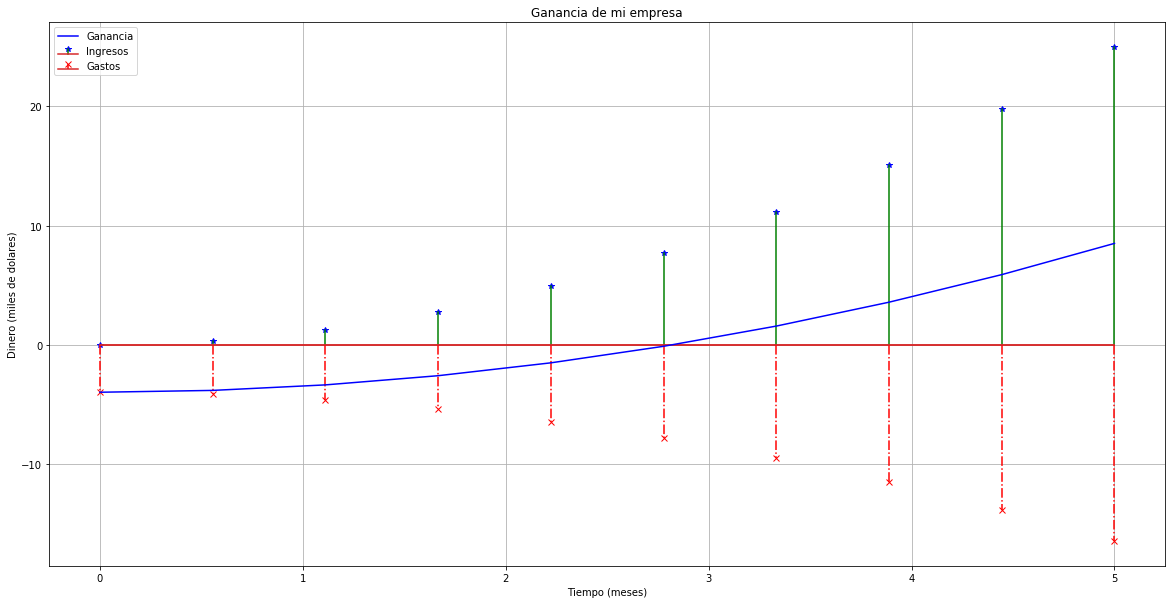

In [0]:
import matplotlib.pyplot as plt
import numpy as np

puntos = 10
espacio = 1

inicio = 0 
fin =  5

x = np.linspace(inicio,fin, puntos)
y = x**2
y2 = -0.5*x**2-4

#Le idnciamos el tamaño de la figura
plt.figure(figsize=(20,10))

# En la priemra letra le decimos el color y despues el estilo de linea

plt.stem(x, y ,'g-',label='Ingresos',markerfmt='b*')
plt.stem(x,y2,'r-.',label = 'Gastos',markerfmt='rx')
plt.plot(x,y+y2,'b-',label = 'Ganancia')

plt.legend()
plt.grid()
plt.xlabel('Tiempo (meses)')
plt.ylabel('Dinero (miles de dolares)')
plt.title("Ganancia de mi empresa")
plt.show()

Si solo nos interesa una parte del gráfico podemos pasarle que nos muestre solo esa parte usando:

> plt.**xlim**((xmin,xmax)) y plt.**ylim**((ymin,ymax))

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# valores de los componentes
# genero un vector con tiempos para evaluar las funciones y plotear

t = np.arange(0, 1, 0.01)

y = np.exp(-t*2+1)

y2 = 1.25*np.exp(t*2-1)

plt.plot(t, y, "green",label="Demanda")
plt.plot(t, y2, "orange",label="Oferta")


plt.ylabel("Cantidad (Millones)")
plt.xlabel("Precio ($)")

# pongo una grilla
#Agregamos Sub divisiones a la grilla
plt.minorticks_on()
#Le asignamos el estilo a la grilla pequeña
plt.grid(which='minor', linestyle=':', linewidth=0.2, color='black')
#Le asignamos el estilo a la grilla mayor
plt.grid(which='major', linestyle='-', linewidth=0.3, color='black')


# agregamos leyenda
plt.legend()

# muestro el grafico que prepare

plt.show()

## Como guardar un grafico
Todos los gráficos que estuvimos haciendo podemos guardarlos como png o jpg para agregarlos a nuestros informes!

Esto lo hacemos con la siguiente función:

> plt.**savefig**(nombre del archivo)

Nota: Es muy imporante que lo hagan antes del **show** ya que si no el gráfico ya se habra enviado a pantalla y se limpia para hacer otro grafico!

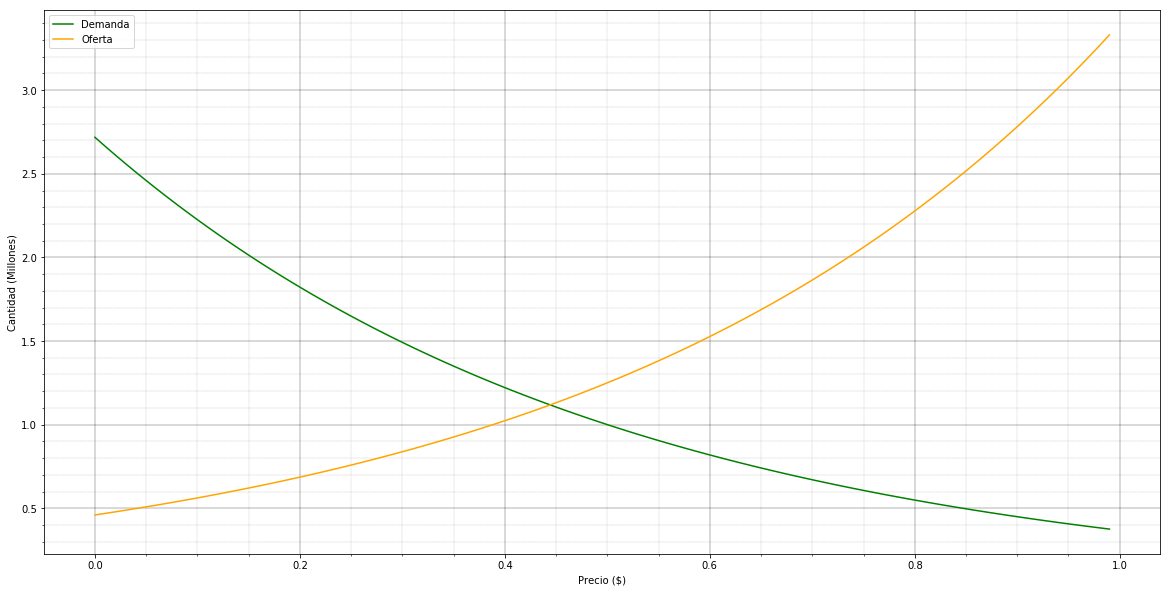

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# valores de los componentes
# genero un vector con tiempos para evaluar las funciones y plotear

t = np.arange(0, 1, 0.01)

y = np.exp(-t*2+1)

y2 = 1.25*np.exp(t*2-1)
plt.figure(figsize=(20,10))
plt.plot(t, y, "green",label="Demanda")
plt.plot(t, y2, "orange",label="Oferta")


plt.ylabel("Cantidad (Millones)")
plt.xlabel("Precio ($)")

# pongo una grilla
#Agregamos Sub divisiones a la grilla
plt.minorticks_on()
#Le asignamos el estilo a la grilla pequeña
plt.grid(which='minor', linestyle=':', linewidth=0.2, color='black')
#Le asignamos el estilo a la grilla mayor
plt.grid(which='major', linestyle='-', linewidth=0.3, color='black')


# agregamos leyenda
plt.legend(loc="upper left")

# muestro el grafico que prepare
plt.savefig('ofdem.png')
plt.show()


# Temas extra
## Como instalar python
Muchas veces querremos trabajar con python en nuestra computadora, para ello vamos a necesitar instalarlo.


1.   Descargar la utlima versión de python en: https://www.python.org/downloads/

2.  Marcar la opción add python to path. La versión puede variar, al escribir este tutorial la ultima versión es (3.7.2).

![](https://files.realpython.com/media/win-install-dialog.40e3ded144b0.png)

3. Seguir el instalador!

## IDE

Es cómodo programar en Colaboratory de Google hasta que el proyecto empieza a tomar tamaño y los bugs se vuelven más prevalentes. Llegado a este punto es una buena decisión mudar el proyecto a un IDE offline. 

IDE  (Integrated Development Enviroment o **Entorno de Desarollo Integrado**) es una aplicación usada para programar. Seguro ya conocen un par, como por ejemplo Colaboratory!

El IDE preferido por la Cátedra del Curso de Python es *PyCharm*. 

---
<center>
  <img src="http://resources.jetbrains.com/storage/products/pycharm/img/meta/pycharm_logo_300x300.png" height=200>
  
  ***PyCharm es de la compañía JetBrains***
</center>



---

Para instalar PyCharm siga el <a href= "https://www.jetbrains.com/pycharm/" >link</a> a la página y haga click en download y escoja la versión comunidad (gratis).

Tenga en cuenta que con el mail <a>@itba.edu.ar</a> otorgado por la facultad se puede adquirir cualquier software de la compañía JetBrains de forma gratuita. Solo hace falta <a href="https://account.jetbrains.com/login">crearse una cuenta</a> con dicho mail y bajarse el <a href="https://www.jetbrains.com/toolbox/app/?fromMenu">Toolbox App</a>.

Cuando usamos una IDE, en general organizamos el trabajo en **proyectos**, donde tenemos todos los archivos y configuraciones pertinentes a un mismo programa. En Pycharm, un proyecto siempre está asociado a una carpeta en particular.

Para crear un proyecto, vamos a *File -> New Project*. Allí podremos elegir un nombre para nuestro proyecto (y la carpeta donde estará guardada), y configurar el intérprete del proyecto. El intérprete es el programa que ejecutará nuestro código.

En general, nos conviene elegir "Existing intepreter" y buscar el Python que tenemos instalado, si es que no aparece automáticamente. Virtual environment puede servir para hacer aplicaciones de distribución.


<center>
  <img src="https://i.imgur.com/K2hI2r2.png" width=800>
</center>


Utilizar una IDE como esta nos da herramientas muy útiles a la hora de programar, a saber:

- [Debugger](https://www.jetbrains.com/help/pycharm/debugging-your-first-python-application.html)
- Corrección de sintaxis: si faltan dos puntos, paréntesis, indentación incorrecta...
- Identificación rápida de errores: variables no usadas, líneas que no tienen efecto en el programa, etc
- Autocomplete
- Navegación rápida por el código, por ejemplo ir rápidamente a una función
- Información sobre los parámetros que recibe cada función
- Correción de estilo y ortográfica (opcional)

# Ejercitación Integrada
$\newcommand{\dif}{\bigstar}$$\newcommand{\facil}{\color{\green}{\dif}}$ $\newcommand{\pieceofcake}{\color{cyan}{\dif}}$$\newcommand{\medio}{\color{\yellow}{\dif\dif}}$$\newcommand{\media}{\medio}$$\newcommand{\normal}{\medio}$  $\newcommand{\dificil}{\color{\orange}{\dif\dif\dif}}$ $\newcommand{\imposible}{\color{\red}{\dif\dif\dif\dif}}$ 

## $\pieceofcake$ Those 3 sides
Escribir una función que dibuje un triangulo equilatero, debe recibir 3 parametros: 


-   X,Y: coordenadas del centro
-   L: Largo de los lados




## $\facil$ Caja y Bigote

Vamos a crear un histograma (visto a comienzo de clase) y un <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html">*Box-and-Whisker plot*</a>. 


<center>
<img src="https://matplotlib.org/_images/sphx_glr_boxplot_demo_pyplot_001.png" height=300 title="Box and Whisker plot ejemplo.">
 </center>
 
 Este tipo de gráfico es comunmente utilizado para mostrar la distribución de una población de forma muy visual.

## Código dado
```
! wget "https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/NotasFinitos.csv"

import pandas as pd
import matplotlib.pyplot as plt
datos = pd.read_csv("NotasFinitos.csv")
print(datos)
```
## Objetivos

### Procesamiento de datos
Procesar Notas de tres parciales (convertirlas a números). Se debería obtener tres listas con notas del 0-140, una para cada uno de los tres parciales. Tengan cuidado que pandas devuelve las notas en formato `string`!

  Función para ver si un valor es `NaN`
 ```
 def isNaN(num):
    return num != num
 ```
 
 ### Graficar Histograma
 
El histograma debería tener 5 barras **por cada parcial**.
 
 **Intervalos:**
 * Notas entre 0-30
 * Notas entre 31-60
 *  Notas entre 61-90
 * Notas entre 91-120
 * Notas entre 121-140
 
 Esto se puede lograr otorgandole un valor a la propiedad  <a href="https://en.wikipedia.org/wiki/Histogram">`bins` del histograma</a>. 
 
```
plt.hist([parcial1,parcial2,parcial3], bins=intervalos_superiores ,label=nombreDeDatasets)
```

  ### Graficar Box-and-Whisker plot
 Graficar el *box-and-whisker plot*
 
 ```
 plt.boxplot([notasParcial1, notasParcial2, notasParcial3])
 ```

 
 
 **Datos y Tips**
 
 * Las notas pueden contener los siguientes valores:
  * `0-140` : Nota numérica
  * `'Ausente'` : Indica ausencia al parcial
  * `'NaN'` : El alumno no cumplio condiciones para rendir parcial (celda vacia)
 
 * Descartar los valores no-numéricos (Ausente y NaN)
 
 * Usar $\mathrm{int()}$ para convertir valores numericos de `string` a `int`!


## $\normal$ Bug Catcher y el disco de la Eutrofia 
Pasaron 10 años desde que se concretó un acuerdo para la construcción de una fabrica de queso al lado del Lago Nahuel Huapi, a dos kilometros de la ciudad natal de *Bug Catcher*. *Bug Catcher* dice que en ese tiempo el agua del lago ha visto un deterioro en su calidad y esta peticionando ante la ciudad la imposición de regulaciones más estrictas sobre los efluentes de la fabrica.

Pero primero tiene que demostrar este deterioro... *Y así,* Bug Catcher *ha venido a tí para pedirte ayuda graficando los resultados de un estudio de agua.*

$\newcommand{\zf}{{z_{\mathrm{f}}}}$

---


<center>
<img src="https://cdn.bulbagarden.net/upload/archive/3/3f/20091012043640%21Spr_RG_Bug_Catcher.png" height=200 title="I catch bugs and stop global conglomerates from getting away with enviromental crimes." ></center>


---


**El estudio**

Se efectua un estudio de <a href="https://en.wikipedia.org/wiki/Trophic_state_index#Eutrophic">turbiedad</a> de agua del tipo <a href="https://en.wikipedia.org/wiki/Secchi_disk">*Secchi*</a> . El estudio consiste en hundir un disco blanco en el cuerpo de agua a estudiar y medir la profundidad $\zf$  a la cual el disco desaparece. Para el estudio se tiene que tener en cuenta la intensidad de la luz sobre el cuerpo de agua $I_0$.



**El problema**

*Bug Catcher* quiere un gráfico que muestre la turbiedad del lago Nahuel Huapi y compararlo a la de otro lago cercano <a href="https://es.wikipedia.org/wiki/Anexo:Definiciones_usuales_en_hidrolog%C3%ADa#Aguas_arriba">*río arriba*</a>. 

**Objetivo**

Graficar la intensidad de luz $I_z$ en el eje vertical a una profundidad $z$ ($z$ en el eje horizontal) para el Nahuel Huapi y el otro lago. 

**Datos**

Rige la ley de <a href="https://en.wikipedia.org/wiki/Beer%E2%80%93Lambert_law">Beer-Lambert</a>:
$$\frac{I_{z}}{I_{0}}=e^{-k z}$$
donde 
* $I_z$ es la intensidad de luz a una profundidad $z$
* $I_0$ es la intensidad de luz sobre la superficie del agua, para un día soleado $I_0\approx 700\  \mathrm{W/m}^2$
* $k$ es el factor de atenuación del agua. Indica turbiedad.

Sabemos que el disco <a href="https://en.wikipedia.org/wiki/Secchi_disk">*Secchi*</a>  de *Bug Catcher* desaparece bajo **56cm** de agua del Nahuel Huapi.  **Para todos los cálculos suponga que la relación** $\frac{I_\zf}{I_0}$ **vale** $10\%$ (para la profundidad a la cual desaparece el disco).

El factor de atenuación del lago *río arriba* fue medido la semana pasada y vale $k_{\mathrm{ra}}=0,009\ \mathrm{cm}^{-1}$.

**Tips:**

* Hay que despejar $k$ y calcularla para el lago Nahuel Huapi antes de graficar
* la función `log` de la libreria `math` es el logaritmo natural
* Pruebe graficar ambas curvas hasta la profundidad $\zf$ del lago río arriba
* **Tener una bolígrafo y un cuaderno abierto ayuda.**

## $\normal$ Las Algas del Nahuel Huapi (Bug Catcher Continuado)

*Bug Catcher* ha <a href="https://link.springer.com/article/10.1007/BF00041459">encontrado un paper</a> sobre el crecimiento de algas en relación a la intensidad de luz. No entiende los gráficos del paper (porque no estan hechos en Python) pero llega a leer:

* Debajo de una intensidad de $3\%$ de la del sol ($I_0$) el crecimiento de las algas dismunuye rapidamente

* entre $3\%$ y $25\%$ las algas crecen bien.

**Objetivo**

Mostrar rango de profundidad a la cual las algas podrían sobrevivir en el Nahuel Huapi en $\color{green}{\textsf{verde}}$ y la zona a partir de la cual sufren en $\color{red}{\textsf{rojo}}$.

**Tips:**
* $\% I_0=\frac{I_{z}}{I_{0}}=e^{-k z}\quad \longrightarrow \quad z = -\frac{\ln(\% I_0)}{k}$  
* Funcion coloreado debajo la curva: `plt.fill_between(zbien, Izbien, color="green",label="Crecimiento bueno")`

**Bonus**

Como se ve afectada la zona donde sobreviven las algas al modificar el parametro $k$?

## $\dificil$ Esos Malditos Mecánicos...
Los mecánicos viven bajo la impresión que el $\text{MATLAB}$ resuelve todos los problemas. Lo que no te cuentan es que cuando llega el momento de guardar o promediar las notas, *abren un Excel*... Si solo alguien les enseñara un poco de Python...

**Intro**

Volodymyr es un profesor de la materia **Elementos Finitos I** en el ITBA. El <a href="https://en.wikipedia.org/wiki/Finite_element_method">método de los elementos finitos</a> consiste en modelar sistemas de solidos o fluidos mediante una partición del sistema en subsistemas que se resuelven en conjunto según condiciones de borde y condiciones iniciales. 

**Problema**

El segundo cuatrimestre del 2018 Volodymyr tomó 3 parciales y ahora quiere obtener estadisticas y además saber cuales alumnos aprobaron y cuales no. El archivo `NotasFinitos.csv` contiene los datos **reales** de dicha materia sin los nombres de los alumnos. 



---
<center>
<img src="https://grupocarman.com/blog/wp-content/uploads/2014/10/Mallado-por-elementos-finitos.png" title="Un modelo de un motor. En rojo las partes más comprometidas por fuerzas." height=200>
  
  ***La resolución correcta de este ejercicio indica que el programador tiene un solido conocimiento del manejo de datos y estructuras de control.***
</center>

---


**Objetivos**

Del archivo `"https://raw.githubusercontent.com/IEEESBITBA/Curso-Python/master/Clase_3_datos/NotasFinitos.csv"` : 

* Obtener promedios para cada parcial
* Obtener promedio para toda la cursada
* Obtener promedios de de los que aprobaron la materia, para cada parcial.


***Condiciones de Borde***

* Condición de aprobación de parcial:   `Nota>=60`

* Para aprobar la materia se necesita aprobar 2 parciales y sumar entre los tres parciales: `sumaNotas>=160` 

* Las notas pueden contener los siguientes valores:
  * `0-140` : Nota numérica
  * `'Ausente'` : Indica ausencia al parcial
  * `'NaN'` : El alumno no cumplio condiciones para rendir parcial (celda vacia)

* Tomar los valores `Ausente` y `NaN` como `0`. Usar la función $\mathrm{isNaN}$ en el código de arriba

**Tips:**
* Las funciones pueden ser muy utiles para este ejercicio! 

* Convertir la nota de `string` a `int` usando la función $\mathrm{int}(Nota)$

* ***hint:*** Hay `49` alumnos de los cuales `19` aprobaron la materia según el criterio dado
